<a href="https://colab.research.google.com/github/davidvlaminck/AWVGeneric/blob/master/BIM4Infra24/OTLMOW_demo_BIM4Infra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installatie in een Python omgeving
Gebruik het pip command om de library te installeren. Dat kan lokaal, maar ook in een notebook zoals hier.

De onderstaande import statements doe je één keer. *Opgelet: de all_classes importeert alle OTL classes en kan best worden vermeden door classes expliciet te importeren. Dit wordt wel in deze demo gebruikt zodat er minder import statements zijn.*

In [6]:
! pip install otlmow-model
from otlmow_model.OtlmowModel.Helpers.all_functions import *
from otlmow_model.OtlmowModel.Helpers.all_classes import * # enkel voor demo's!

import logging # set logging
logging.getLogger().setLevel(logging.INFO)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.9 MB/s eta 0:00:00


# Basis concepten
## Het eerste OTL object aanmaken
Importeer de juiste klasse en instantieer deze met ronde haken. Daarna kan je de attributen aanpassen en het object "printen" om te zien wat er in zit.


In [7]:
shrubbery = SolitaireHeester()
shrubbery.notitie = 'Wanted by the knights who say "Ni!"'

print(shrubbery)

<SolitaireHeester> object
    typeURI : https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester
    notitie : Wanted by the knights who say "Ni!"


Je kan ook gebruik maken van het dynamisch aanmaken van objecten op basis van de URI of van de naam en de namespace. Dit doe je door
 `dynamic_create_instance_from_uri` of `dynamic_create_instance_from_ns_and_name` te gebruiken. Dit heeft als voordeel dat je meer flexibiliteit hebt in je scripts.

In [8]:
another_shrubbery = dynamic_create_instance_from_uri('https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester')

print(another_shrubbery)

<SolitaireHeester> object
    typeURI : https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester


In [9]:
another_shrubbery = dynamic_create_instance_from_ns_and_name(namespace='onderdeel', class_name='SolitaireHeester')

print(another_shrubbery)

<SolitaireHeester> object
    typeURI : https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester


`from otlmow_model.OtlmowModel.Classes.Onderdeel.SolitaireHeester import SolitaireHeester`

Het voordeel van de **expliciete** import voor een applicatie is snelheid. Een voordeel voor een ontwikkelaar is dat je broncode gemakkelijk kan bekijken.

## Attributen
Je kan nu attributen gebruiken, net zoals in andere code. Er is zelfs een auto-complete. IDE's zoals PyCharm kunnen nog veel meer tonen.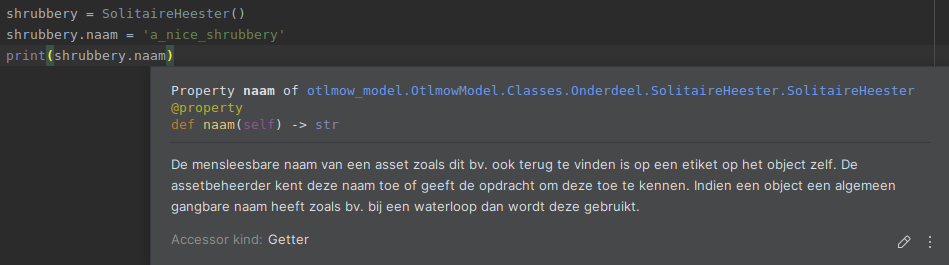

In [10]:
shrubbery.isActief = True
shrubbery.toestand = 'in-gebruik'
shrubbery.naam = 'a_nice_shrubbery'
shrubbery.assetId.identificator = 'shrubbery_1'
shrubbery.soortnaam.soortnaamNederlands = 'heester'

print(f'De naam van de shrubbery is: {shrubbery.naam}')

De naam van de shrubbery is: a_nice_shrubbery


In [11]:
print(shrubbery)

<SolitaireHeester> object
    typeURI : https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester
    assetId :
        identificator : shrubbery_1
    isActief : True
    naam : a_nice_shrubbery
    notitie : Wanted by the knights who say "Ni!"
    soortnaam :
        soortnaamNederlands : heester
    toestand : in-gebruik


## Validatie op de attributen
De meerwaarde van deze OTL implementatie is natuurlijk dat er validatie is bij het invullen en bevragen. Zo krijg je een foutmelding bij het ingeven van een foute keuzelijstwaarde.

In [12]:
shrubbery.toestand = 'foute_waarde'

ValueError: foute_waarde is not a valid option for toestand, find the valid options using print(meta_info(<object>, attribute="toestand"))

Je kan gebruik maken van de meta_info functie om het attribuut te bevragen. Voor keuzelijsten krijg je dan een oplijsting van de mogelijke waardes.

In [13]:
print(meta_info(shrubbery, attribute='toestand'))

Showing metadata of toestand:
typeURI: https://wegenenverkeer.data.vlaanderen.be/ns/implementatieelement#AIMToestand.toestand
definition: Geeft de actuele stand in de levenscyclus van het object.
valid values:
    geannuleerd
    gepland
    in-gebruik
    in-ontwerp
    in-opbouw
    overgedragen
    uit-gebruik
    verwijderd


Je kan op die manier ook de klasse zelf bevragen en zo ook de attributen zien en hun type.

In [14]:
print(meta_info(shrubbery))

Showing metadata of SolitaireHeester:
typeURI: https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester
definition: Afzonderlijk te onderscheiden heester. Heesters zijn houtachtige planten die in of dicht bij de grond vertakken. Anders dan een boom vormen ze in het algemeen geen duidelijke stam, maar komen de meeste soorten met een aantal takken uit de grond, die dan ook grondtakken genoemd worden. Voorwaarde is wel dat de plant in zijn eventuele stam en takken houtweefsel vormt, hoewel dat niet tot in het hart hoeft te zijn.
attributes:
    assetId (type: DtcIdentificator)
    bestekPostNummer (type: String)
    datumOprichtingObject (type: Date)
    geometry (type: WKT)
    hoogte (type: KlVegetatieelementHoogte)
    isActief (type: Boolean)
    naam (type: String)
    niveau (type: Decimal)
    notitie (type: String)
    soortnaam (type: DtcVegetatieSoortnaam)
    standaardBestekPostNummer (type: String)
    standplaats (type: KlVegetatieelementStandplaats)
    theore

In [15]:
print(meta_info(shrubbery, attribute='soortnaam'))

Showing metadata of soortnaam:
typeURI: https://wegenenverkeer.data.vlaanderen.be/ns/abstracten#VegetatieElement.soortnaam
definition: Met deze eigenschap worden de Nederlandse soortnaam, wetenschappelijke soortnaam en de soortcode van de plantensoort weergegeven.
attributes:
    code (type: String)
    soortnaamNederlands (type: String)
    soortnaamWetenschappelijk (type: String) <deprecated since 2.12.0>
    wetenschappelijkeSoortnaam (type: KlWetenschappelijkeSoortnaam)


Wanneer de gebruiker een verkeerde waarde ingeeft, zal er eerst geprobeerd worden om deze alsnog te converteren naar correcte waarde. Bijvoorbeeld wanneer men een boolean (True/False) als een tekst invult, wordt die waarde wel aanvaard. Dit geeft wel een waarschuwing.

In [16]:
shrubbery.isActief = 'True'

/usr/local/lib/python3.10/dist-packages/otlmow_model/OtlmowModel/BaseClasses/BooleanField.py:34: IncorrectTypeWarning: Assigned a string to a boolean datatype. Automatically converted to the correct type. Please change the type
  warnings.warn(category=IncorrectTypeWarning,


## Geometrie
Het Geometrie Artefact is mee geïmplementeerd. Dat wil zeggen dat je, waar van toepassing, het attribuut "geometry" kan invullen met een WKT string en dat deze op de mogelijke types volgens het GA wordt gevalideerd.

In [17]:
shrubbery.geometry = 'LINESTRING Z (200000 200000 0, 200000 200001 0)'

WrongGeometryTypeError: Asset type SolitaireHeester shouldn't be assigned a LINESTRING Z as geometry, valid types are POINT Z

Op aangeven van de foutmelding, wordt er nu een geometrie van het juiste type ingevuld, die geen fout oplevert.

In [18]:
shrubbery.geometry = 'POINT Z (200000 200000 0)'

## Validatie op relaties
Naast assets kan je ook relaties tussen assets valideren. Via *is_valid_relation(...)* kan je checken of een relatie mogelijk is tussen twee assets.

In [19]:
ground = Grond()
print(f'relatie LigtOp: {is_valid_relation(source=shrubbery, target=ground, relation_type=LigtOp)}')
print(f'relatie Bevestiging: {is_valid_relation(source=ground, target=shrubbery, relation_type=Bevestiging)}')

relatie LigtOp: True
relatie Bevestiging: False


Bovendien kan je met *create_relation(...)* de relatie meteen aanmaken. Om die relatie aan te maken hebben zowel de bron als het doel een identificator nodig, die dan ook in de identificator van de relatie wordt overgenomen.

In [20]:
ground.assetId.identificator = 'the_ground'
ligt_op = create_relation(source=shrubbery, target=ground, relation_type=LigtOp)
print(ligt_op)

<LigtOp> object
    typeURI : https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#LigtOp
    assetId :
        identificator : LigtOp_-_shrubbery_1_-_the_ground
        toegekendDoor : OTLMOW
    bron :
    bronAssetId :
        identificator : shrubbery_1
    doel :
    doelAssetId :
        identificator : the_ground


## Python dictionaries
Een dictionary in Python is heel efficiënte datastructuur. Daarom is er een gemakkelijke omzetting voorzien van de Python OTL objecten naar dictionaries en omgekeerd.

In [21]:
shrubbery_dict = shrubbery.to_dict()
import json
print(json.dumps(shrubbery_dict, indent=4))

{
    "geometry": "POINT Z (200000 200000 0)",
    "toestand": "in-gebruik",
    "isActief": true,
    "assetId": {
        "identificator": "shrubbery_1"
    },
    "notitie": "Wanted by the knights who say \"Ni!\"",
    "naam": "a_nice_shrubbery",
    "soortnaam": {
        "soortnaamNederlands": "heester"
    },
    "typeURI": "https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester"
}


En ook omgekeerd...

In [22]:
shrubbery_dict = {
    'toestand': 'in-gebruik',
    'isActief': True,
    'assetId': {'identificator': 'another_shrubbery'},
    'notitie': 'Also wanted by the knights who say "Ni!"',
    'naam': 'another_shrubbery',
    'typeURI': 'https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester'
}
another_shrubbery = OTLObject.from_dict(shrubbery_dict)
print(another_shrubbery)

<SolitaireHeester> object
    typeURI : https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester
    assetId :
        identificator : another_shrubbery
    isActief : True
    naam : another_shrubbery
    notitie : Also wanted by the knights who say "Ni!"
    toestand : in-gebruik


## Meer
Er zijn nog meer features beschikbaar zoals het vergelijken van assets, kopiëren van attributen etcetera. Een laatste handige feature voor wie met Linked Data wil werken is de omzetting naar een RDF dictionary:

In [23]:
another_shrubbery_rdf = another_shrubbery.to_dict(rdf=True)
import json
print(json.dumps(another_shrubbery_rdf, indent=4))

{
    "https://wegenenverkeer.data.vlaanderen.be/ns/implementatieelement#AIMToestand.toestand": "https://wegenenverkeer.data.vlaanderen.be/id/concept/KlAIMToestand/in-gebruik",
    "https://wegenenverkeer.data.vlaanderen.be/ns/implementatieelement#AIMDBStatus.isActief": true,
    "https://wegenenverkeer.data.vlaanderen.be/ns/implementatieelement#AIMObject.assetId": {
        "https://wegenenverkeer.data.vlaanderen.be/ns/implementatieelement#DtcIdentificator.identificator": "another_shrubbery"
    },
    "https://wegenenverkeer.data.vlaanderen.be/ns/implementatieelement#AIMObject.notitie": "Also wanted by the knights who say \"Ni!\"",
    "https://wegenenverkeer.data.vlaanderen.be/ns/implementatieelement#AIMNaamObject.naam": "another_shrubbery",
    "@type": "https://wegenenverkeer.data.vlaanderen.be/ns/onderdeel#SolitaireHeester"
}


# Hoe worden deze classes opgebouwd?
De classes worden gegenereerd vanuit een andere OTLMOW package, ModelBuilder. Deze kan gebruikt worden om vertrekkende van een OTL SQLite of een subset een model op te bouwen. Optioneel wordt ook het Geometrie Artefact opgegeven.

In [24]:
! pip install otlmow-modelbuilder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 15.3 MB/s eta 0:00:00


Download de laatste versie van de OTL en het Geometrie Artefact

In [25]:
import urllib.request
urllib.request.urlretrieve('https://wegenenverkeer.data.vlaanderen.be/doc/implementatiemodel/master/html/OTL.db', 'OTL.db')
urllib.request.urlretrieve('https://wegenenverkeer.data.vlaanderen.be/doc/implementatiemodel/master/html/Geometrie_Artefact.db', 'GA.db')

('GA.db', <http.client.HTTPMessage at 0x78fe1c298f40>)

Bouw het model in de map "demo_model" (ongeveer 40 seconden)

In [26]:
from otlmow_modelbuilder.ModelBuilder import ModelBuilder
from pathlib import Path

current_dir = Path('.').parent
otl_subset_path = Path(current_dir / 'OTL.db')
GA_path = Path(current_dir / 'GA.db')
model_directory = Path(current_dir / 'demo_model')

ModelBuilder.build_otl_datamodel(otl_subset_location=otl_subset_path,
                                 geometry_artefact_location=GA_path,
                                 directory=model_directory, environment='prd')

INFO:root:started creating model at 09/12/2024 21:18:38
INFO:root:Created an instance of OTLPrimitiveDatatypeCreator
  0%|          | 0/65 [00:00<?, ?it/s]INFO:root:Skip creating class for Literal
INFO:root:Skip creating class for AnyURI
INFO:root:Skip creating class for Boolean
INFO:root:Skip creating class for Date
INFO:root:Skip creating class for DateTime
INFO:root:Skip creating class for Decimal
INFO:root:Skip creating class for Integer
INFO:root:Skip creating class for NonNegativeInteger
INFO:root:Skip creating class for String
INFO:root:Skip creating class for Time
100%|██████████| 65/65 [00:00<00:00, 1811.71it/s]
INFO:root:Created an instance of OTLComplexDatatypeCreator
100%|██████████| 65/65 [00:00<00:00, 1949.51it/s]
INFO:root:Created an instance of OTLUnionDatatypeCreator
100%|██████████| 7/7 [00:00<00:00, 1730.63it/s]
INFO:root:Created an instance of OTLEnumerationCreator
INFO:root:Downloaded, unzipped and parsed the enumerations ttl file
100%|██████████| 909/909 [00:00<00

Ter info: dit script wordt elke nacht op GitHub uitgevoerd. Elke ochtend staat er dus mogelijk een nieuwere versie van het model klaar, wanneer er een update is van de OTL of het Geometrie Artefact, of wanneer er iets verandert in de keuzelijsten.

# Converter

In [27]:
! pip install otlmow-converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 9.1 MB/s eta 0:00:00


Tot nu toe hadden we de aangemaakte objecten alleen in het geheugen. Hun nut is beperkt. Daarom is er de converter module die omzettingen toelaten naar allerlei formaten en structuren:
- een bestand (conform de richtlijnen voor het DAVIE platform)
- een dataframe
- een dotnotation_dict



Onderstaande code maakt 100 assets van het type Metselwerk aan in een for-loop. Vervolgens exporteer je deze naar een Excel bestand met één lijn code.

In [28]:
from otlmow_converter.OtlmowConverter import OtlmowConverter
muren = []
for index in range(100):
    muur = Metselwerk()
    muur.assetId.identificator = f'muur_{index}'
    muur.notitie = 'Romani ite domum'
    muren.append(muur)

OtlmowConverter.to_file(muren, file_path=Path('muren.xlsx'))

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Je kan de objecten ook omzetten naar een pandas Dataframe. Onderstaande code laadt eerst de interactieve component in voor dataframes in Google Colab en daarna worden dezelfde 100 objecten omgezet naar een Dataframe en getoond.

In [29]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [30]:
df_muren = OtlmowConverter.to_dataframe(muren)
df_muren

,assetId.identificator,notitie,typeURI
0,muur_0,Romani ite domum,https://wegenenverkeer.data.vlaanderen.be/ns/o...
1,muur_1,Romani ite domum,https://wegenenverkeer.data.vlaanderen.be/ns/o...
2,muur_2,Romani ite domum,https://wegenenverkeer.data.vlaanderen.be/ns/o...
3,muur_3,Romani ite domum,https://wegenenverkeer.data.vlaanderen.be/ns/o...
4,muur_4,Romani ite domum,https://wegenenverkeer.data.vlaanderen.be/ns/o...
...,...,...,...
95,muur_95,Romani ite domum,https://wegenenverkeer.data.vlaanderen.be/ns/o...
96,muur_96,Romani ite domum,https://wegenenverkeer.data.vlaanderen.be/ns/o...
97,muur_97,Romani ite domum,https://wegenenverkeer.data.vlaanderen.be/ns/o...
98,muur_98,Romani ite domum,https://wegenenverkeer.data.vlaanderen.be/ns/o...


Maar: de conversies zijn steeds mogelijk in twee richtingen!!
Je kan dus ook bestanden inladen.

Met andere woorden: conversie tussen alles mogelijk!

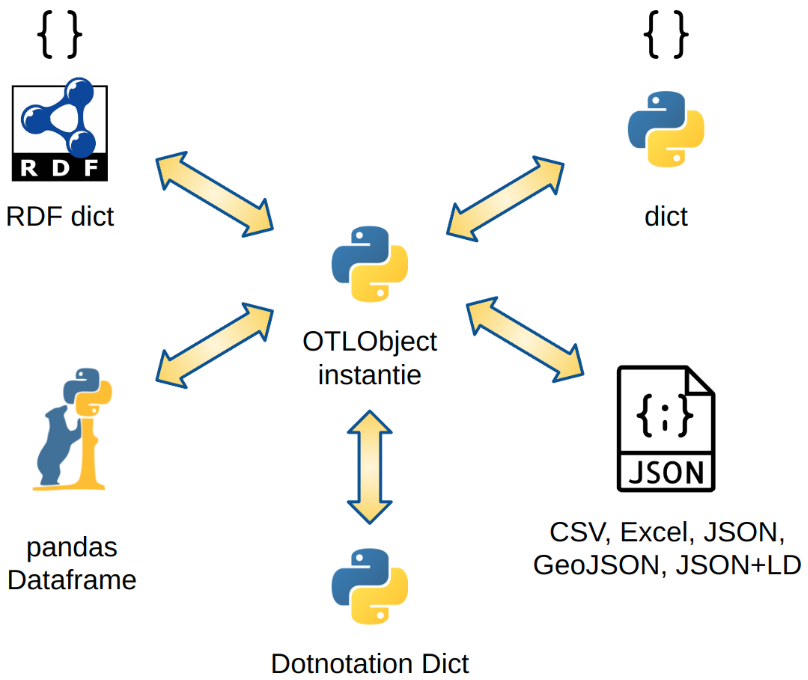

In [31]:
OtlmowConverter.to_file(df_muren, file_path=Path('muren.json'))

# Visualiseren
Met de otlmow-Visuals library kan je gemakkelijk de OTL objecten visualiseren in een relatiediagram.

In [33]:
! pip install otlmow-visuals

In [34]:
from otlmow_visuals.PyVisWrapper import PyVisWrapper
from IPython.display import HTML
from pathlib import Path

PyVisWrapper().show([shrubbery, ligt_op, ground],
                    html_path = Path('example.html'), notebook_mode=True)

HTML(filename="example.html")

# DAVIE client
Zie OTLMOW-DAVIE/Demo